# Modelo Dorogovtsev, Mendes e Samukhin (DMS) para redes sem escala típica

In [8]:
# Bibliotecas

import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [9]:
# Configurações iniciais, definição dos parâmetros e criação das listas

# Coeficientes
A = 2 # offset (atratividade inicial VIRTUAL) ou conectividade inicial
M_o = 2 # número de ligações entre si dos vértices na condição inicial

m = 5 # Para condição inicial (constante)
N_final = 500 # Tamanho final da rede (tem a função de gerar as listas com os tamanhos necessários)

lista_k = [0]*N_final # Para armazenamento dos graus de cada vértice
lista_adj = [0]*N_final # Para armazenamento das ligações de cada vértice

lista_todas_prob = [0]*N_final # Armazenamento das probabilidades de cada vértice
lista_soma_prob = [0]*N_final # Armazenamento da som das probabilidades para cada posição (utilizado para seleção das ligações do novo vértice)

# contador para criação da lista_adj[] com o tamanho final da rede
ite_n = 0

# Cria uma lista com o tamanho desejado do sistema
while ite_n < N_final:
  lista_adj[ite_n] = [ite_n] # Em cada posição da lista_adj[] será criada uma outra lista com um único item, de acordo com a numeração ite_n
  ite_n += 1


In [10]:
# Condição inicial da rede: três vértices ligados igualmente M_o vezes

# Contadores
ite_m = 0
ite_m2 = 0 

# Gera a condição inicial (T=0) 
while ite_m < M_o:
  ite_m2 = ite_m + 1
  
  while ite_m2 < M_o + 1: # Pois o número inicial de vértices existentes (N_o = M_o + 1) precisa ser maior do que M_o. ite_m2 faz o papel de N_o.
    # Atualiza as ligações entre dois vértices
    lista_adj[ite_m].append(ite_m2)
    lista_adj[ite_m2].append(ite_m) 

    # Atualiza os graus dos vértices que foram ligados
    lista_k[ite_m] = lista_k[ite_m] + 1
    lista_k[ite_m2] = lista_k[ite_m2] + 1

    ite_m2 += 1
  ite_m += 1

print(lista_adj)
print(lista_k)

[[0, 1, 2], [1, 0, 2], [2, 0, 1], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155],

In [11]:
# Cálcula a probabilidade de conexão associada a cada vértice que já está na rede

def calcula_prob(ite_n): # O parâmetro recebido 'ite_n' diz a função quandos vértices já fazem parte da rede a cada iterada 
  soma_prob = 0
  ite_p = 0 # contador

  while ite_p < ite_n + 1: # O percorrimento desse 'while' aumenta a cada iterada a medida que o variável associada ao tamanho da rede atual (ite_n) aumenta
    prob = float((A + lista_k[ite_p]) / (sum(lista_k) + (A*(ite_n+1)))) # Probabilidade de um dado vértices receber novas ligações

    lista_todas_prob[ite_p] = prob # Armazena a probabilidade de conexão (conectividade Ki) atualizada do vértice na posição 'ite_p'
    soma_prob = soma_prob + prob
    lista_soma_prob[ite_p] = soma_prob # Armazena a soma das probabilidades atual para cada vértice na posição 'ite_p'. A soma acumulada aumenta com ite_p, 
                                       # de maneira que menores índices de probabilidade acumulada (posições iniciais em 'lista_todas_prob[]) favoreçam os vértices iniciais
    ite_p += 1                         # a receberem ligação primeiro (ligação preferencial) a medida que a 'lista_soma_prob' é percorrida na função 'encontra_v2'


In [12]:
# Função que procura com quem o vértice que está entrando na rede irá se conectar. 
# É esta função que caracteriza a regra da ligação preferencial

def encontra_v2(ite_n, prob_v2):
  ite_n2 = 0 # Contador para indexar a posição na lista 'lista_soma_prob'

  while ite_n2 < ite_n +1 : # Percorre no máximo o tamanho da lista de acordo com a quantidade atual de elementos (ite_n)
    if lista_soma_prob[ite_n2] >= prob_v2: 
      return ite_n2
    ite_n2 += 1

In [13]:
# (ii) iteração das regras de conexão

# Passo (2) - laço principal

ite_n = M_o + 1 # 'ite_n' fará o papel de N (atual da rede)

while ite_n < N_final: # Executado enquanto 'ite_n' (que representa o N atual) seja menor do que o 'N_final' (tamanho final da rede)
  #v1 = ite_n # Vértice que está entrando na rede
  calcula_prob(ite_n) # Calcula a probabilidade associada a cada vértice que está na rede de receber ligações do vértice que entrou a cada iterada e armazena esses valores
  
  ite_m = 0 # Contador

  while ite_m < m: # Bloco executado sempre 'm' vezes 
    v1 = random.randrange(0, ite_n+1)
    #prob_v1 = random.random() # Número aleatório entre 0-1 (para comparação com v1 na função 'encontra_v2')
    #v1 = encontra_v2(ite_n, prob_v1) # vértice do qual irá partir uma das 'm' ligações
    prob_v2 = random.random()
    v2 = encontra_v2(ite_n, prob_v2) # Vértice da rede escolhido através da execução da função 'encontra_v2' para receber ligação de 'v1'

    while v2 == None: # Este laço evita autoarestas e limitam os vértices a terem no máximo uma ligação entre si
      prob_v2 = random.random()
      v2 = encontra_v2(ite_n, prob_v2)

    lista_adj[v2].append(v1) # Adiciona na posição [v2] (que é uma lista por sí só dentro da lista_adj[]) o valor v1. Ou seja, conecta v1 (entrando) à  v2 (preexistente) 
    lista_k[v2] = lista_k[v2] + 1 # Atualiza os gráus dos vértices em questão nas posições v1 e v2

    ite_m += 1
  #print('M = ',  M, 'N = ', ite_n)
  ite_n += 1

# Passo (3) - Extração de dados da rede

max_k = max(lista_k) # Armazena na variável o maior valor da lista_k[]
histograma_k = [0]*(max_k + 1) # Criar a quantidade de posições na lista histograma_k necessárias para o armazenamento
soma_histograma_k = [0]*(max_k + 1)

ite_n = 0

while ite_n < N_final:
  histograma_k[lista_k[ite_n]] = histograma_k[lista_k[ite_n]] + 1 # Armazena em cada posição da lista histograma_k[] a quantidade de vértices que possuem tal grau. 
                                                                  # Cada posição na lista histograma_k[] significa o valor do grau. [0] grau zero; [1] grau 1...
                                                                  # Exemplo: [0,5,2,7,10,8] a posição [3] (grau 3) possui 7 vértices com grau 3
  ite_n += 1 



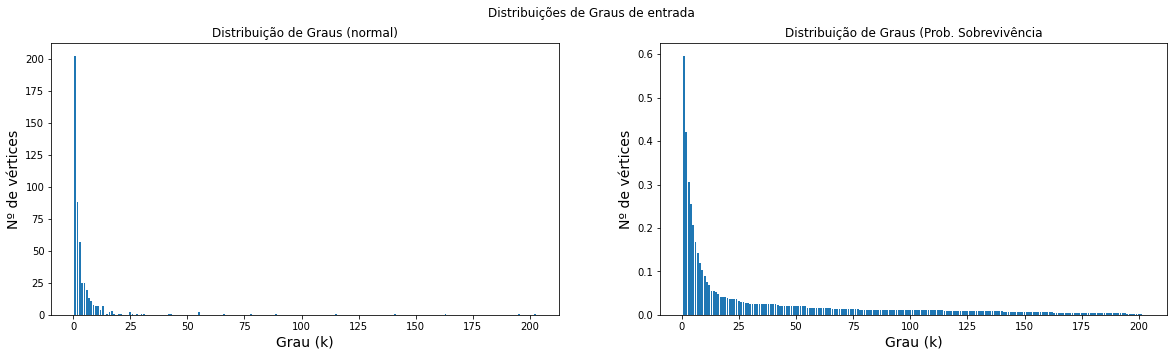

 soma_histograma_k:  [0.596, 0.42, 0.306, 0.256, 0.206, 0.168, 0.142, 0.12, 0.104, 0.09, 0.076, 0.068, 0.054, 0.054, 0.052, 0.048, 0.042, 0.04, 0.04, 0.038, 0.036, 0.036, 0.036, 0.036, 0.032, 0.03, 0.03, 0.028, 0.028, 0.026, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.022, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0

In [14]:
# plot do histograma

k = [] # Lista que armazenara os valores dos graus
i = 0

for i in range(len(histograma_k)):
  soma_histograma_k[i] = sum(histograma_k[i+1:]) # soma, em cada posição 'i' a quantidade de vértices presentes na rede que possuem mais 
                                                 # do que 'i' conexões (probabilidade de sobrevivencia)
  soma_histograma_k[i] = soma_histograma_k[i] / N_final    # Dividir por 'N_final' é para normalização
  
  k.append(i + 1) # +1 para sincronizar a lista 'k' com 'histograma_k'
  i += 1

# Cria um 'espaço' de tamanho x = 20 e y = 5 inches onde iremos plotar os subgráficos
figura= plt.figure(figsize=(20,5))
figura.suptitle('Distribuições de Graus de entrada') # título geral do 'espaço'
facecolor='blue'

# Primeiro subgráfico
figura.add_subplot(121)
plt.bar(k,histograma_k)
plt.xlabel('Grau (k)', fontsize = 14)
plt.ylabel('Nº de vértices', fontsize = 14)
plt.title('Distribuição de Graus (normal)')

# Segundo subgráfico (gráico da regressão linear)
figura.add_subplot(122) # '1' linha, '2' colunas e o último '1' significa o plot do subgráfico na primeira posição
plt.bar(k,soma_histograma_k)
plt.xlabel('Grau (k)', fontsize = 14)
plt.ylabel('Nº de vértices', fontsize = 14)
plt.title('Distribuição de Graus (Prob. Sobrevivência')

#plt.savefig('grafico.png', dpi =100) # salva a figura na mesma pasta que está o arquivo
plt.show(figura)

#np.savetxt('Distribuicao_sobrevivencia_%s.dat' %A, np.array([k,soma_histograma_k]).transpose()) # salva arquivo .dat
#np.savetxt('distribuicao_normal_%s.dat'%N_final, np.array([k,histograma_k]).transpose()) # salva arquivo .dat

print(' soma_histograma_k: ', soma_histograma_k)
print('      histograma_k: ', histograma_k)
print('           Lista k: ', k)


<ipython-input-15-5b9ea3737b9a>:18: RuntimeWarning: divide by zero encountered in log
  Z1 = np.log(Z)


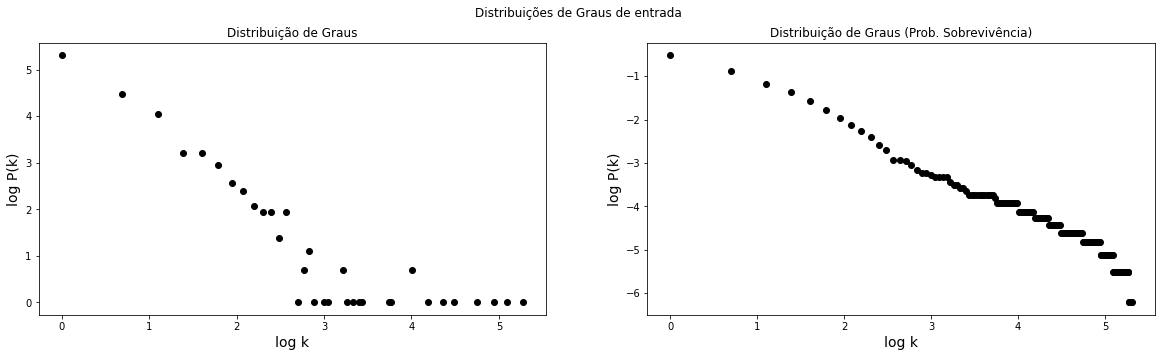

In [15]:
# plot da distribuição log-log

# Convertendo 'k' e 'histograma_k' em um array NumPy. X = k ; Y = histograma_k
X = np.array(k)
Y = np.array(soma_histograma_k)
Z = np.array(histograma_k)

# Mapeia quais índices em Y possuem valor 0  armazena em 'indexes'. 'indexes' é uma lista que armazena as posições que possuem o valor 0
indexes = np.where(Y == 0)

# Remove das listas X e Y os índices que possuem elementos 0 da lista Y. Argumentos da função 'delete(arr, obj, axis)'
X = np.delete(X, indexes)
Y = np.delete(Y, indexes)
Z = np.delete(Z, indexes)

X1 = np.log(X)
Y1 = np.log(Y)
Z1 = np.log(Z)

X = X1
Y = Y1
Z = Z1

# Gráficos 

# Cria um 'espaço' de tamanho x = 20 e y = 5 inches onde iremos plotar os subgráficos
figura= plt.figure(figsize=(20,5))
figura.suptitle('Distribuições de Graus de entrada') # título geral do 'espaço'
facecolor='blue'

# Primeiro subgráfico
figura.add_subplot(121)
plt.scatter(X,Z,label='Y(X)', color='black')
plt.xlabel('log k', fontsize = 14)
plt.ylabel('log P(k)', fontsize = 14)
plt.title('Distribuição de Graus')

# Segundo subgráfico (gráico da regressão linear)
figura.add_subplot(122) # '1' linha, '2' colunas e o último '1' significa o plot do subgráfico na primeira posição
plt.scatter(X,Y,label='Y(X)', color='black')
#plt.plot(X[P:Q],reta[P:Q],label='Ajuste linear',color='red'); # plot da reta de regressão
plt.xlabel('log k', fontsize = 14)
plt.ylabel('log P(k)', fontsize = 14)
plt.title ('Distribuição de Graus (Prob. Sobrevivência)')

#plt.savefig('grafico.png', dpi =100) # salva a figura na mesma pasta que está o arquivo
plt.show(figura)